# SVM: Support Vector Machines

In [1]:
# Load Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Use seaborn plotting defaults
import seaborn as sns; sns.set()

# Widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Aux functions
import aux_functions
from aux_functions import plot_svc_decision_function

# Creacion de datos

Usaremos la función make_blobs de samples_generator para generar número aleatorios con k centros y la función scatter para dibujarlos

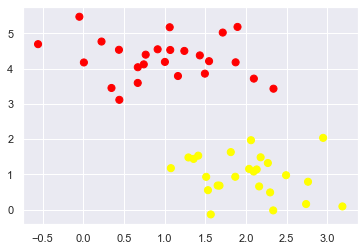

In [2]:
from sklearn.datasets import make_blobs
# crearemos un ejemplo con 50 patrones y 2 centroides
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Se obtiene dos clases diferentes, la roja y la amarilla perfectamente separables

# SVM lineal


Un clasificador lineal intenta dibujar una línea recta que separara los dos conjuntos de datos y, por lo tanto, crea un modelo para la clasificación. Es decir, el objetivo es construir un hiperplano óptimo que separe las clases.

Para datos bidimensionales como el del ejemplo se podría hacer a mano. Pero inmediatamente vemos un problema: hay más de una posible línea divisoria que puede discriminar perfectamente entre las dos clases!

El hiperplano óptimo es aquel que maximiza las distancias de todos los puntos más cercanos de cada clase. Lo que reduce la posibilidad de clasificar mal un nuevo.

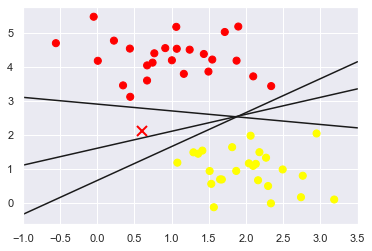

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Estas tres rectas o hiperplanos son separadores muy diferentes que, sin embargo, discriminan perfectamente entre estas muestras. 

Dependiendo de cuál elijamos, se le asignará una etiqueta diferente a un nuevo punto de datos (por ejemplo, el marcado con la "X" en este gráfico).

Por tanto hay que tener una técnica que nos permita elegir el mejor hiperplano en este problema.

# **Support Vector Machines:** Maximizar el margen

EL objetivo es encontrar el hiperplano que mejor generalice para el problema.

Para ello se calcula la distancia de los puntos mas cercanos al hiperplano y se maximiza.

Graficamente podemos dibujar estos hiperplanos con una franja en la que toca a los puntos más cercanos.

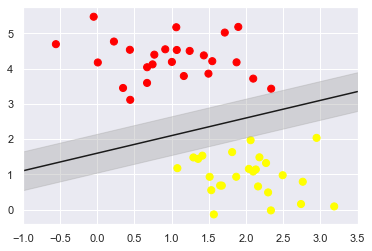

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

#(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)
for m, b, d in [(0.5, 1.6, 0.55)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

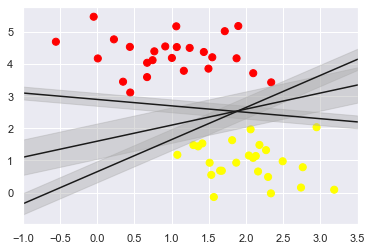

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

# SVM model

Con esta intuicion vamos a construir los primeros modelos. 

Cargamos la función necesaria para SVC.

In [7]:
from sklearn.svm import SVC # "Support vector classifier"

Llamamos al modelo con sus parámetros

In [8]:
model = SVC(kernel='linear', C=10000000000)

Entrenamos el modelo

In [9]:
model.fit(X, y)

SVC(C=10000000000, kernel='linear')

Creamos una funcion que nos permita pintar el hiperplano, con los márgenes de decisión y los vectores soporte, aquellos que caen sobre el margen

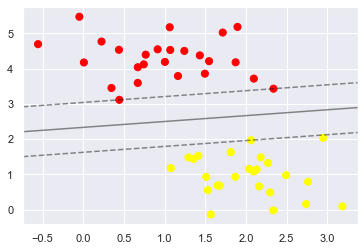

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);


¿Cuáles son los vectores soporte?


In [11]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

En este caso tenemos 3 vectores soporte, 2 rojos y uno amarillo, aunque cerca encontramos otro punto amarillo pero que no llega a ser vector soporte

# Parametro de regularización: C

En la vida real vamos a tener casos menos perfectos y nos encontraremos datos de las distintas clases mezclados.

Vamos a crear mediante la función make_blobs este tipo de datos.

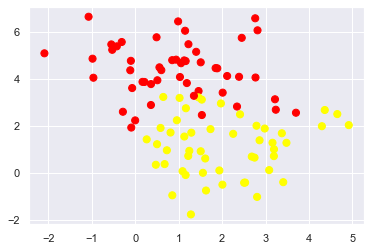

In [12]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Cuando los datos no se pueden separar de forma lineal completamente o el problema es muy complejo para clasificar correctamente, podemos indicar al modelo una buena generalización aunque no todos los datos se clasifiquen perfectos.

Esto se puede controlar con el hiperparametro C, que nos da la complejidad del modelo.

- Una **C pequeña** puede dar un modelo demasiado sencillo con **Undefitting**.

- Una **C grande** puede ser un modelo que no generelice bien y se ajuste mucho al train, modelo con **Overfitting**.



Vamos  dibujar un plot que nos permita visualizar como cambiando el parametro de regularizacion C, se suaviza el margen y permite al modelo clasificar mas patrones mal

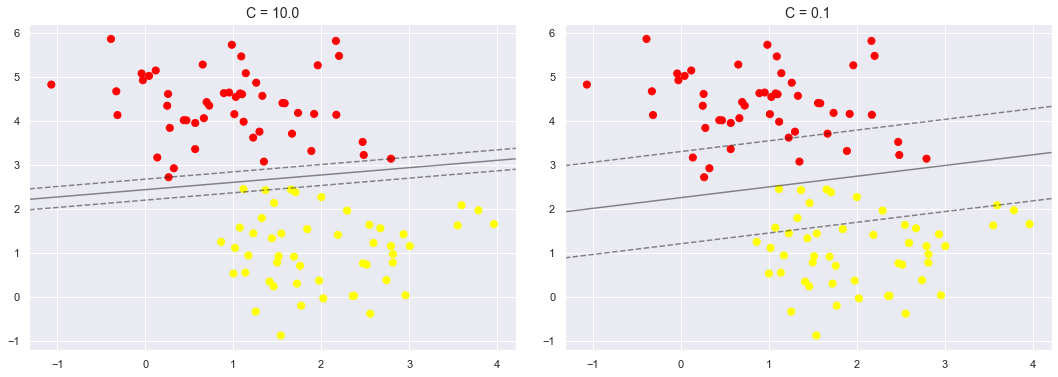

In [13]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

En el primer caso C=10 permitmos menos errores, solo tenemos uno.

En el segundo donde la C es mas pequeña, C=0.1, aumenta mucho el numero de patrones mal clasificados.

Dependiendo del número de errores que quereamos permitir a nuestro modelo tendremos una C u otra. 

Esta C debería ser elegida mediante una metaparametrización.

# Datos no separables linealmente. Non linear margin (Kernel Trick)


Mediante la librería sample_generator con la funcion make_circles creamos datos que no son linealmente separables

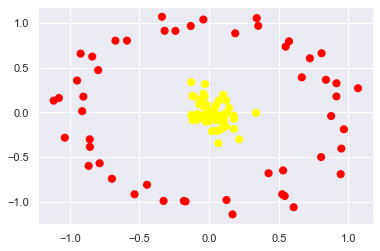

In [14]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Vamos a tratar de hacer un modelo lineal mediante el parametro kernel = linear

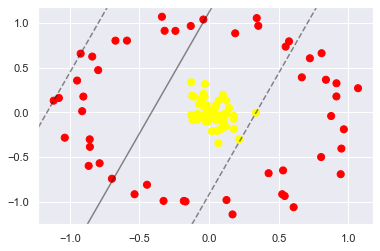

In [15]:
clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Como vemos el hiperplano no es capaz de separar los datos ya que quedan puntos rojos a ambos lados.

Para solucionar este problema usamos el truco del Kernel o Kernel Trick.

Consiste en llevar los datos a nueva dimension espacial que nos permita separar las clases con un separador lineal.

 Creamos la funcion Radial basis function que nos permitirá llevar los datos a otra dimensión

In [16]:
r = np.exp(-(X ** 2).sum(1))

Podemos visualizar los datos en una tercera dimension

<img src="../figures/kernel_notebook.png" width="50%">


En python con Scikit-Learn, podemos aplicar SVM para datos no linealmente separable usado el truco del kernel. 

Simplemente cambiamos nuestro kernel lineal a un kernel RBF (función de base radial), utilizando el hiperparámetro del modelo de kernel:

In [18]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Pintamos ahora nuestros datos junto con el hiperplano obtenido con nuestra SVM lineal.

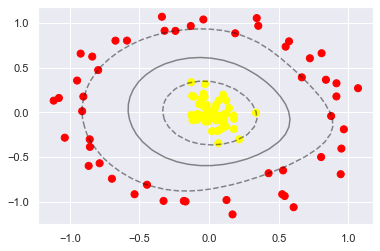

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');


Podemos observar que ahora los datos quedan perfectamente separados mediante un sepador no lineal